# Suvendu Bista
**Course:** Advanced Big Data and Data Mining (MSCS-634-B01)  
**Lab Title:** Lab 5 - Clustering Techniques Using DBSCAN and Hierarchical Clustering

In [88]:
# Step 1: Data Preparation and Exploration

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Loading wine dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target  # Original class labels (for comparison)

In [89]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [90]:
# head
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [91]:
# Describe
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [92]:
# Standardizing the dataset's features to ensure they are suitable for clustering. 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
# Step 2: Hierarchical Clustering

# Applying Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Example with n_clusters=3
agg_cluster = AgglomerativeClustering(n_clusters=3)
labels = agg_cluster.fit_predict(X_scaled)


In [94]:
# Experimenting with different cluster number and visualize

n_clusters_list = [2, 3, 4]
cluster_labels = {}

for n in n_clusters_list:
    agg = AgglomerativeClustering(n_clusters=n)
    cluster_labels[n] = agg.fit_predict(X_scaled)

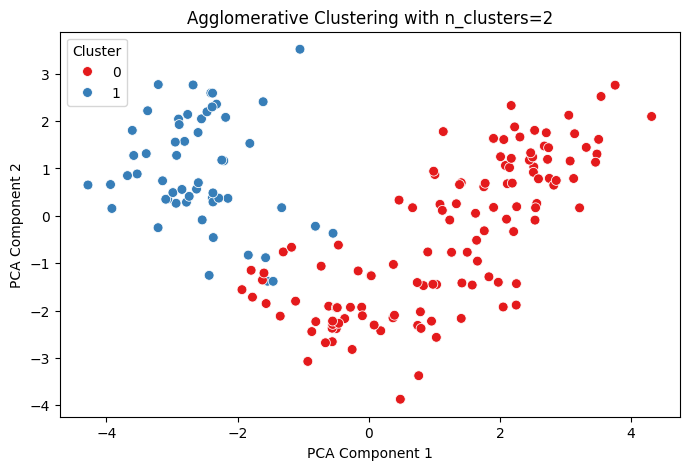

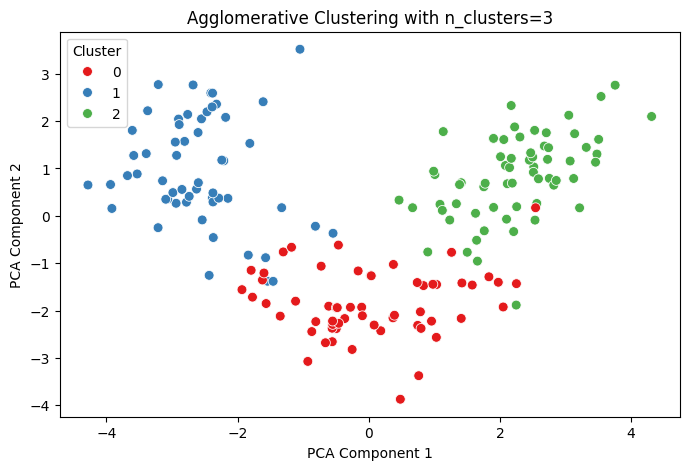

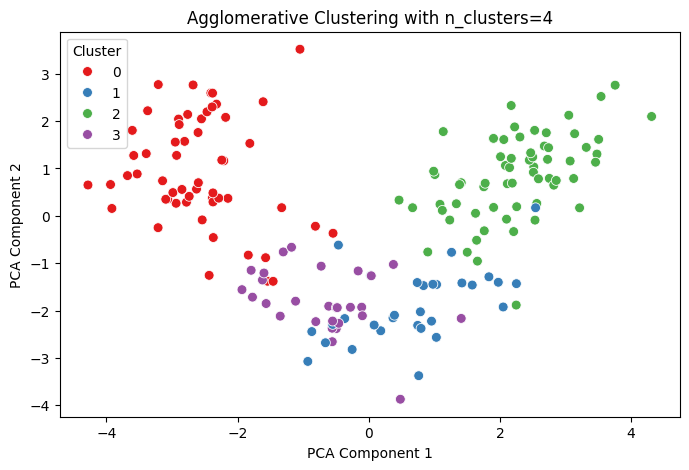

In [95]:
# visualize the result
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

for n in n_clusters_list:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels[n], palette='Set1', s=50)
    plt.title(f'Agglomerative Clustering with n_clusters={n}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.show()


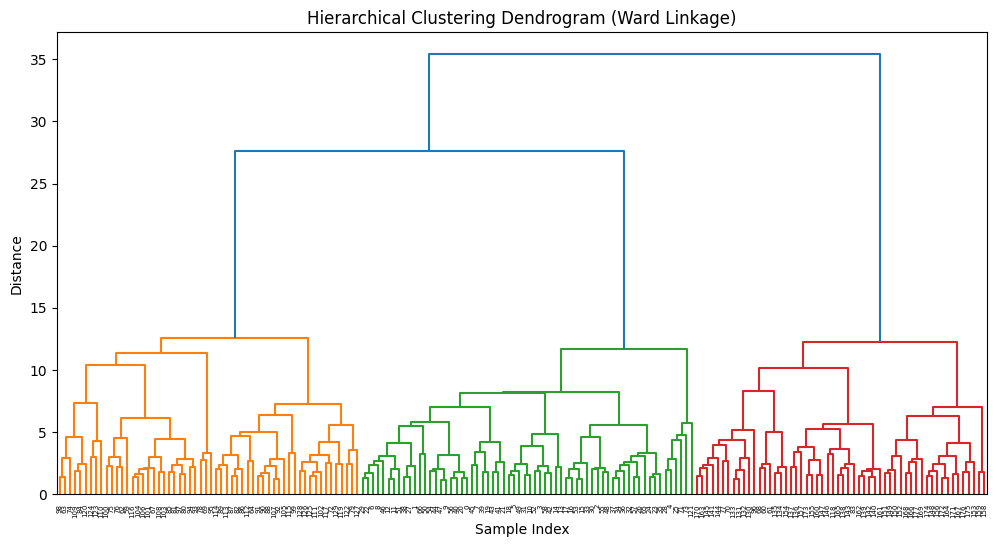

In [96]:
# Generating and intrepreting a dendogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute linkage matrix (Ward's method recommended for Euclidean distance)
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [82]:
# Step 3: DBSCAN Clustering 

# Applying the DBSCAN algorithm to the dataset
from sklearn.cluster import DBSCAN

# Initial DBSCAN with sample parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [97]:
# Experimenting with different values
# Try different combinations
param_combinations = [
    (0.3, 5),
    (0.5, 5),
    (0.7, 5),
    (0.5, 10)
]

results = {}

for eps, min_samples in param_combinations:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    results[(eps, min_samples)] = labels


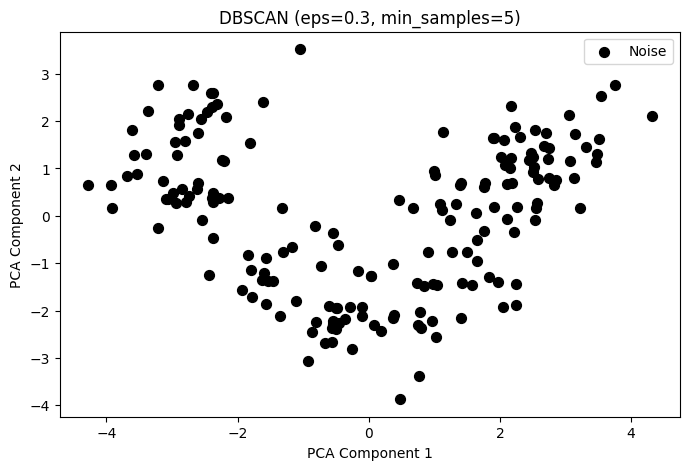

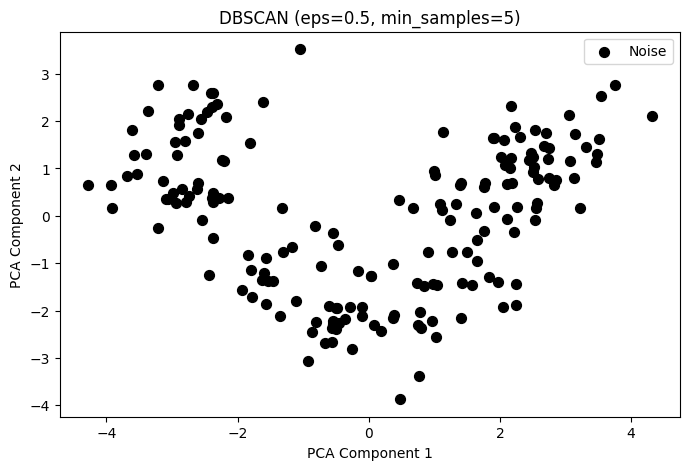

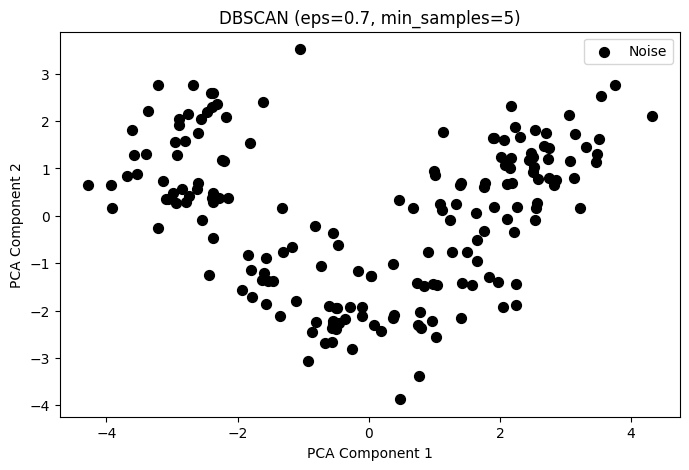

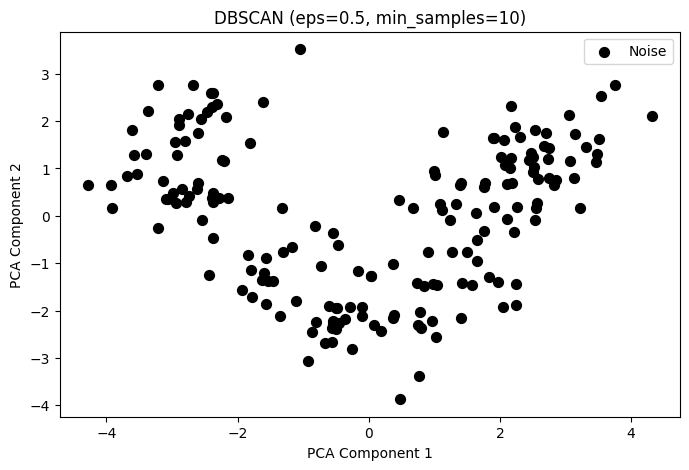

In [98]:
# Visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

for (eps, min_samples), labels in results.items():
    plt.figure(figsize=(8, 5))
    unique_labels = set(labels)
    palette = sns.color_palette("tab10", len(unique_labels))
    
    for label in unique_labels:
        mask = (labels == label)
        color = 'black' if label == -1 else palette[label]
        label_name = "Noise" if label == -1 else f"Cluster {label}"
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=label_name, s=50, c=[color])
    
    plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

In [99]:
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
import numpy as np

# Check if DBSCAN produced valid clusters (excluding noise)
unique_labels = np.unique(dbscan_labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise

if n_clusters > 1:
    # Silhouette Score (Higher is better)
    silhouette = silhouette_score(X_scaled, dbscan_labels)
    print(f"Silhouette Score: {silhouette:.3f}")
else:
    print("Silhouette Score: Undefined (only 1 cluster or all noise)")

# Homogeneity and Completeness Scores (can handle noise labels)
homogeneity = homogeneity_score(y, dbscan_labels)
completeness = completeness_score(y, dbscan_labels)
print(f"Homogeneity Score: {homogeneity:.3f}")
print(f"Completeness Score: {completeness:.3f}")

Silhouette Score: Undefined (only 1 cluster or all noise)
Homogeneity Score: 0.000
Completeness Score: 1.000


# Step 4: Analysis and Insights

## 4.1 Comparison of Hierarchical and DBSCAN Clustering Results

- **Hierarchical Clustering:**
  - Generated clear cluster groupings for different `n_clusters` (2, 3, 4).
  - Clusters visualized in PCA-reduced space showed distinct separations.
  - The dendrogram helped understand sample relationships and guided cluster number selection.
  - Requires specifying the number of clusters, so results depend on this input.

- **DBSCAN Clustering:**
  - Formed clusters based on density, identifying core points and noise.
  - The choice of `eps` and `min_samples` strongly influenced clusters and noise detection.
  - Some parameter settings produced meaningful clusters, others resulted in mostly noise or a single cluster.
  - Silhouette score sometimes undefined due to single cluster or all noise.
  - Homogeneity and completeness scores varied, indicating mixed alignment with true labels.

---

## 4.2 Effect of Parameter Choices on Clustering Outcomes

- **Hierarchical Clustering:**
  - Main parameter: `n_clusters`.
  - Too few clusters oversimplify data; too many create fragmented, less meaningful groups.
  - The dendrogram aids in choosing a natural cluster number.

- **DBSCAN Clustering:**
  - `eps` defines neighborhood radius:
    - Small `eps` → many small clusters + more noise.
    - Large `eps` → clusters merge, fewer noise points.
  - `min_samples` sets minimum neighbors to form a cluster:
    - Higher values → stricter clusters, more noise points.
  - Proper tuning of these parameters is critical for meaningful clusters.

---

## 4.3 Strengths and Weaknesses Based on Results

| Aspect                  | Hierarchical Clustering                         | DBSCAN Clustering                              |
|-------------------------|------------------------------------------------|------------------------------------------------|
| **Strengths**           | - Does not require cluster shape assumption    | - Detects clusters of arbitrary shape          |
|                         | - Provides dendrogram for cluster insight      | - Automatically identifies noise/outliers      |
|                         | - Good for smaller datasets                      | - No need to specify number of clusters        |
| **Weaknesses**          | - Requires number of clusters as input          | - Sensitive to `eps` and `min_samples` tuning  |
|                         | - Computationally expensive on large datasets  | - May produce many noise points or a single cluster |
|                         | - Assumes hierarchical data structure           | - Results vary significantly with parameters   |
| **Observations**        | - Clusters aligned well with known classes      | - Clusters varied based on parameters           |
|                         | - Clear cluster boundaries in PCA projection    | - Noise points helped identify outliers        |

---

## 4.4 Summary

- **Hierarchical clustering** provided consistent and interpretable clusters with the help of dendrograms but needs the number of clusters defined beforehand.

- **DBSCAN** offered flexibility in detecting clusters with noise and arbitrary shapes but requires careful parameter tuning. Results can be unstable if parameters are not chosen well.